<a href="https://colab.research.google.com/github/Suriyakrishnansuriya/FPL_tweets_sentiment_analysis/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis using VaderSentiment**

In [77]:
# install vadersentiment module

# !pip install vaderSentiment
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import wordcloud


In [18]:
# load the dataset
df= pd.read_csv('FPL_tweets.csv')
df.head()

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following
0,2.855350e+17,2012-12-30 23:56:11+00:00,AmythLFC,I scored 75 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,559,812
1,2.855290e+17,2012-12-30 23:31:55+00:00,BenBoutwood,"110,525 have transferred Walcott into fantasy ...",NaN,0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,False,267,351
2,2.855270e+17,2012-12-30 23:24:56+00:00,ddreid88,I scored 61 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""http://twitter.com/download/android"" ...",Essex,False,7,64
3,2.855270e+17,2012-12-30 23:23:26+00:00,ahmedkungora16,I scored 71 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,132,1100
4,2.855260e+17,2012-12-30 23:20:13+00:00,murray_rankin,My life's ambition is to one week be the highe...,"['fpl', 'aiminghigh']",0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","Glasgow, Scotland",False,133,453


In [19]:
# check the shape of data--> row,columns
df.shape

(114466, 13)

In [20]:
# check how many null values in the data
df.isnull().sum()

ID                      0
Timestamp               0
User                    0
Text                    0
Hashtag             85691
Retweets                0
Likes                   0
Replies                 0
Source                  0
Location            33754
Verified_Account        0
Followers               0
Following               0
dtype: int64

In [21]:
# check if any duplicates values in the data
df.duplicated().sum()

0

In [25]:
# drop 2 columns because thease very large amount of data is null
# this data not a nessesory 
df.drop(['Hashtag', 'Location'],axis=1, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114466 entries, 0 to 114465
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                114466 non-null  float64
 1   Timestamp         114466 non-null  object 
 2   User              114466 non-null  object 
 3   Text              114466 non-null  object 
 4   Retweets          114466 non-null  int64  
 5   Likes             114466 non-null  int64  
 6   Replies           114466 non-null  int64  
 7   Source            114466 non-null  object 
 8   Verified_Account  114466 non-null  bool   
 9   Followers         114466 non-null  int64  
 10  Following         114466 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(4)
memory usage: 8.8+ MB


In [27]:
df.describe()

,ID,Retweets,Likes,Replies,Followers,Following
count,1.144660e+05,114466.000000,114466.000000,114466.000000,1.144660e+05,114466.000000
mean,9.480945e+17,0.829023,8.953925,0.509968,5.883736e+04,1581.477845
std,4.266224e+17,31.520381,385.871745,6.868008,9.473768e+05,4744.950874
min,2.627060e+17,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,5.412505e+17,0.000000,0.000000,0.000000,2.070000e+02,174.000000
50%,9.355795e+17,0.000000,0.000000,0.000000,6.670000e+02,499.000000
75%,1.321098e+18,0.000000,1.000000,0.000000,2.741000e+03,1261.000000
max,1.644840e+18,7805.000000,85997.000000,1317.000000,4.000798e+07,235775.000000


In [31]:
tweets= df[['Text']]
tweets

,Text
0,I scored 75 points in Gameweek 20 on Fantasy P...
1,"110,525 have transferred Walcott into fantasy ..."
2,I scored 61 points in Gameweek 20 on Fantasy P...
3,I scored 71 points in Gameweek 20 on Fantasy P...
4,My life's ambition is to one week be the highe...
...,...
114461,My FPL Gameweek 19 Kneejerk Reaction | Transfe...
114462,"@Jim_Keoghan Come on, he was my captain in fan..."
114463,@wapzzgo Fantasy Premier League
114464,"WOL vs MUN Dream11 Prediction, Fantasy Footbal..."


# **sentiment analysis**

In [33]:
# initilize sentiment analyzer and create new columns to add a scores

analyzer= SentimentIntensityAnalyzer()
tweets['sentiment_score']= tweets['Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
tweets

<ipython-input-33-0d175422f91b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['sentiment_score']= tweets['Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


,Text,sentiment_score
0,I scored 75 points in Gameweek 20 on Fantasy P...,0.0000
1,"110,525 have transferred Walcott into fantasy ...",0.4404
2,I scored 61 points in Gameweek 20 on Fantasy P...,0.0000
3,I scored 71 points in Gameweek 20 on Fantasy P...,0.0000
4,My life's ambition is to one week be the highe...,0.0000
...,...,...
114461,My FPL Gameweek 19 Kneejerk Reaction | Transfe...,0.0000
114462,"@Jim_Keoghan Come on, he was my captain in fan...",0.0000
114463,@wapzzgo Fantasy Premier League,0.0000
114464,"WOL vs MUN Dream11 Prediction, Fantasy Footbal...",-0.2500


In [38]:
# split the sentimnets( Positive, Negative and Neutral ) depends on the sentiment_score

limit= 0.05
tweets['sentiments']= tweets['sentiment_score'].apply(lambda x: 'Positive' if x > limit else ('Negative'if x < -limit else 'Neutral') )

<ipython-input-38-7c40c5510da9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['sentiments']= tweets['sentiment_score'].apply(lambda x: 'Positive' if x > limit else ('Negative'if x < -limit else 'Neutral') )


In [39]:
tweets

,Text,sentiment_score,sentiments
0,I scored 75 points in Gameweek 20 on Fantasy P...,0.0000,Neutral
1,"110,525 have transferred Walcott into fantasy ...",0.4404,Positive
2,I scored 61 points in Gameweek 20 on Fantasy P...,0.0000,Neutral
3,I scored 71 points in Gameweek 20 on Fantasy P...,0.0000,Neutral
4,My life's ambition is to one week be the highe...,0.0000,Neutral
...,...,...,...
114461,My FPL Gameweek 19 Kneejerk Reaction | Transfe...,0.0000,Neutral
114462,"@Jim_Keoghan Come on, he was my captain in fan...",0.0000,Neutral
114463,@wapzzgo Fantasy Premier League,0.0000,Neutral
114464,"WOL vs MUN Dream11 Prediction, Fantasy Footbal...",-0.2500,Negative


In [53]:
# how many counts of sentiments in the data
sentiment_results= tweets['sentiments'].value_counts().reset_index(name= 'counts').rename(columns={'index' :'sentiment'})
sentiment_results

,sentiment,counts
0,Neutral,55614
1,Positive,44344
2,Negative,14508


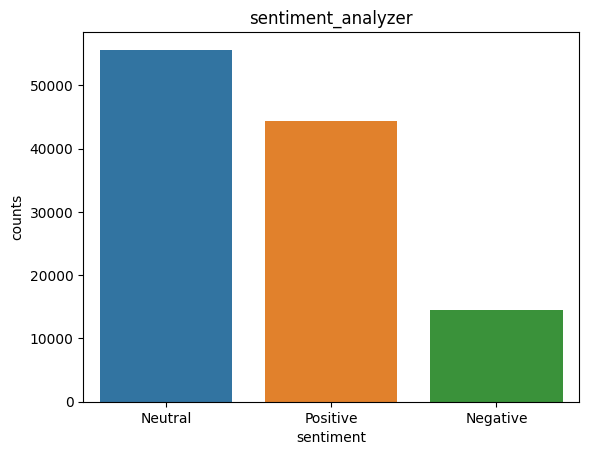

In [60]:
# barplot for sentiments counts
sns.barplot(data= sentiment_results, x='sentiment', y='counts')
plt.title('sentiment_analyzer')
plt.xlabel('sentiment')
plt.ylabel('counts')
plt.show()

# **Plot in wordcloud**

In [74]:
#filter the positive data
positive_data= tweets[tweets['sentiments']=='Positive']
positive_data

,Text,sentiment_score,sentiments
1,"110,525 have transferred Walcott into fantasy ...",0.4404,Positive
13,Atleast I won all my premier league fantasy ma...,0.5719,Positive
22,anyone doing fantasy premier league? Want to j...,0.3612,Positive
25,Join Our league In Fantasy Premier league :\nC...,0.5267,Positive
26,@dpnorwich @_fantasypremier another wildcard f...,0.8268,Positive
...,...,...,...
114451,@FPL__Raptor Dear Fantasy Premier League.........,0.3818,Positive
114452,@welchy123 @harrykyprianou @_tomblair are high...,0.3987,Positive
114454,"Enter… Fantasy Premier League (FPL), the habit...",0.5255,Positive
114459,"This season to get my fantasy itch, I have par...",0.4767,Positive


In [75]:
#filter the negative data
negative_data= tweets[tweets['sentiments']=='Negative']
negative_data

,Text,sentiment_score,sentiments
5,@rossdeadmanz no he dint tell me u seen fantas...,-0.2960,Negative
19,I have done absolutely shite on Fantasy Premie...,-0.4404,Negative
29,I scored 86 points in Gameweek 20 on Fantasy P...,-0.3818,Negative
33,Bad gameweek... Fantasy Premier League http://...,-0.5423,Negative
37,":'( ""@_fantasypremier: Average score for GW20 ...",-0.4939,Negative
...,...,...,...
114456,"People using twitter to post about Politis , a...",-0.0772,Negative
114457,"#PremierELEVEN Boa tarde,Bom Ano novo . Acred...",-0.2960,Negative
114458,@lee1892Johnson Premier League fantasy league ...,-0.1779,Negative
114464,"WOL vs MUN Dream11 Prediction, Fantasy Footbal...",-0.2500,Negative


In [76]:
#filter the neutral data
neutral_data= tweets[tweets['sentiments']=='Neutral']
neutral_data

,Text,sentiment_score,sentiments
0,I scored 75 points in Gameweek 20 on Fantasy P...,0.0,Neutral
2,I scored 61 points in Gameweek 20 on Fantasy P...,0.0,Neutral
3,I scored 71 points in Gameweek 20 on Fantasy P...,0.0,Neutral
4,My life's ambition is to one week be the highe...,0.0,Neutral
6,@fantasy_premier kok saya udh daftar FPL tapi ...,0.0,Neutral
...,...,...,...
114453,Fantasy Premier League game-week 19 player pic...,0.0,Neutral
114455,Fantasy Premier League Player Rankings: Gamewe...,0.0,Neutral
114461,My FPL Gameweek 19 Kneejerk Reaction | Transfe...,0.0,Neutral
114462,"@Jim_Keoghan Come on, he was my captain in fan...",0.0,Neutral


In [82]:
str(positive_data['Text'])

'1         110,525 have transferred Walcott into fantasy ...\n13        Atleast I won all my premier league fantasy ma...\n22        anyone doing fantasy premier league? Want to j...\n25        Join Our league In Fantasy Premier league :\\nC...\n26        @dpnorwich @_fantasypremier another wildcard f...\n                                ...                        \n114451    @FPL__Raptor Dear Fantasy Premier League.........\n114452    @welchy123 @harrykyprianou @_tomblair are high...\n114454    Enter… Fantasy Premier League (FPL), the habit...\n114459    This season to get my fantasy itch, I have par...\n114460    NOT vs CHE | Nottingham Forest vs Chelsea | Pr...\nName: Text, Length: 44344, dtype: object'

(-0.5, 399.5, 199.5, -0.5)

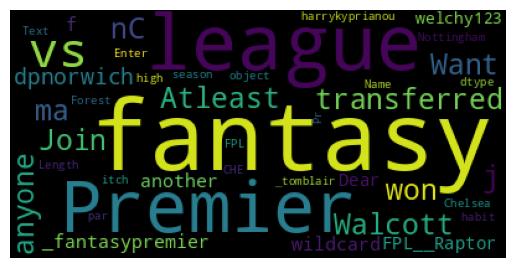

In [93]:
wcp= wordcloud.WordCloud().generate(str(positive_data['Text']))
plt.imshow(wcp)
plt.axis('off')

In [91]:
str(negative_data['Text'])

'5         @rossdeadmanz no he dint tell me u seen fantas...\n19        I have done absolutely shite on Fantasy Premie...\n29        I scored 86 points in Gameweek 20 on Fantasy P...\n33        Bad gameweek... Fantasy Premier League http://...\n37        :\'( "@_fantasypremier: Average score for GW20 ...\n                                ...                        \n114456    People using twitter to post about Politis , a...\n114457    #PremierELEVEN  Boa tarde,Bom Ano novo . Acred...\n114458    @lee1892Johnson Premier League fantasy league ...\n114464    WOL vs MUN Dream11 Prediction, Fantasy Footbal...\n114465    One of my dumbest achievements has been doing ...\nName: Text, Length: 14508, dtype: object'

(-0.5, 399.5, 199.5, -0.5)

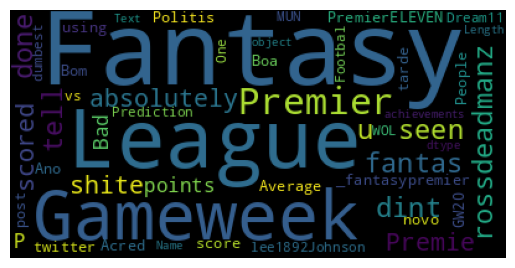

In [94]:
wcn= wordcloud.WordCloud().generate(str(negative_data['Text']))
plt.imshow(wcn)
plt.axis('off')

In [96]:
str(neutral_data['Text'])

"0         I scored 75 points in Gameweek 20 on Fantasy P...\n2         I scored 61 points in Gameweek 20 on Fantasy P...\n3         I scored 71 points in Gameweek 20 on Fantasy P...\n4         My life's ambition is to one week be the highe...\n6         @fantasy_premier kok saya udh daftar FPL tapi ...\n                                ...                        \n114453    Fantasy Premier League game-week 19 player pic...\n114455    Fantasy Premier League Player Rankings: Gamewe...\n114461    My FPL Gameweek 19 Kneejerk Reaction | Transfe...\n114462    @Jim_Keoghan Come on, he was my captain in fan...\n114463                      @wapzzgo Fantasy Premier League\nName: Text, Length: 55614, dtype: object"

(-0.5, 399.5, 199.5, -0.5)

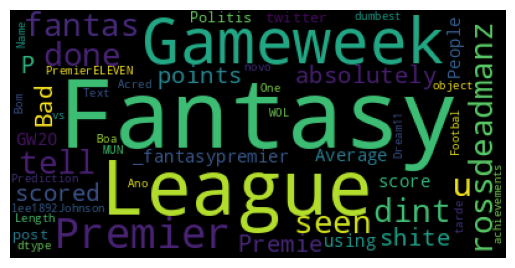

In [95]:
wcnt= wordcloud.WordCloud().generate(str(negative_data['Text']))
plt.imshow(wcnt)
plt.axis('off')